<a href="https://colab.research.google.com/github/fabian57fabian/OptimizationMethodsVisualizer/blob/main/OptimizationMethodsVisualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Methods Visualizer in Python

This notebook was created to give a visual understanding about Optimization Methods algotythms.


# Libraries initialization

The blocks below will set up the environment with necessary libraries.

Run the following cell to set up the system.

In [1]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
!pip install simpy
!pip install git+https://github.com/amkatrutsa/liboptpy

  Cloning https://github.com/amkatrutsa/liboptpy to /tmp/pip-req-build-x2qkh81w
  Running command git clone -q https://github.com/amkatrutsa/liboptpy /tmp/pip-req-build-x2qkh81w
  Created wheel for liboptpy: filename=liboptpy-0.0.1-cp37-none-any.whl size=12848 sha256=000172785808b02cf1aea1327c23146971641358faef43bb9b56bc507fcf0549
  Stored in directory: /tmp/pip-ephem-wheel-cache-lcztg9rv/wheels/8e/6e/38/60496dcf12f2c341e42d932d1403bdaaa17049556fdaba8d40
Successfully built liboptpy


In [2]:
import time
%matplotlib inline
# %matplotlib notebook is not yet supported by Google Colab, so interactivity is out of the way. When using IPython or copying to local file, it will should make you interact with it

This method will be used to rotate the view when needed for 3d plots

In [3]:
from enum import Enum
rotation_x, rotation_y = 60, -80

class Rotation(Enum):
  LEFT = 1,
  RIGHT = 2,
  UP = 3,
  DOWN = 4

def rotate_view(rot:Rotation):
  global rotation_x, rotation_y
  if rot == Rotation.LEFT:
    rotation_y -= 10
  if rot == Rotation.RIGHT:
    rotation_y += 10
  if rot == Rotation.UP:
    rotation_x -= 10
  if rot == Rotation.DOWN:
    rotation_x += 10

Next code will be used to plot a 3d function in 2d with level curves

In [4]:
from autograd import elementwise_grad, value_and_grad
def my_plot_2d(x, y, f, one_point=None, vectors=[], title=''):
  dz_dx = elementwise_grad(f, argnum=0)(x, y)
  dz_dy = elementwise_grad(f, argnum=1)(x, y)

  fig, ax = plt.subplots(figsize=(10, 6))
  min, max = np.nanmin(z), np.nanmax(z)
  ax.contour(x, y, z, levels=np.logspace(0, 4, 50), norm=LogNorm(), cmap=plt.cm.jet)
  ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
  if one_point is not None: ax.plot(*one_point, 'ro', markersize=10)

  for v in vectors:
    plt.quiver(*v, color=['r','b','g'], scale=21)

  if title != '': plt.title(title)

  ax.plot()

  ax.set_xlabel('$x$')
  ax.set_ylabel('$y$')

  ax.set_xlim((xmin, xmax))
  ax.set_ylim((ymin, ymax))

  plt.show()

Next code will be used to plot a 3d function in 3d with a surface and meshgrid.

In [5]:
# Use this: https://colab.research.google.com/drive/1lnl5UPFWVPrryaZZgEzd0theI6S94c3X#scrollTo=OEwd0xc5eGz9
# Use this for 3d: https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb#scrollTo=9Yar-dBGrSf-
from matplotlib.colors import LogNorm
import matplotlib.colors as colors

def my_plot_3d(x, y, f, one_point_3d=None, vectors=[], title=''):
  global rotation_x, rotation_y
  global xmin, xmax, ymin, ymax
  fig = plt.figure(figsize=(16, 10))
  ax = plt.axes(projection='3d', elev=50, azim=-50)

  ax.set_xlabel('$x$')
  ax.set_ylabel('$y$')
  ax.set_zlabel('$z$')

  ax.set_xlim((xmin, xmax))
  ax.set_ylim((ymin, ymax))

  cmap = plt.cm.jet
  cmap.set_bad('w',1.)

  def plot_datas(x, y, z, point, vectors):
    # Interesting plot : https://stackoverflow.com/questions/21504046/plotting-only-one-point-in-3d-matplotlib
    surf = ax.plot_surface(x, y, z, cmap=plt.cm.jet, alpha=.95, rstride=1, cstride=1, edgecolor='none',vmin=np.nanmin(z), vmax=np.nanmax(z))#norm=colors.LogNorm(vmin=z.min(), 
    #surf = ax.contour3D(x, y, z,50, cmap=plt.cm.jet, alpha=.95, vmin=np.nanmin(z), vmax=np.nanmax(z))#norm=colors.LogNorm(vmin=z.min(), 
    if point is not None:
      ax.plot([point[0]],[point[1]],[point[2]], 
              markerfacecolor='k', 
              markeredgecolor='k', 
              marker='o', 
              markersize=20, 
              alpha=0.6)
    for v in vectors:
      x1,x2,x3,y1,y2,y3 = v
      plt.quiver(x1,x2,x3,y1,y2,y3, color='red')
    plt.show(block=False)
  
  if title != '': plt.title(title)

  ax.view_init(rotation_x, rotation_y)

  plot_datas(x,y,z,one_point_3d, vectors)
  plt.close()

# Defining target function, constraints

Now let's create a function! we could either define one or create a lambda. Do as you wish.

In [6]:
#f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2
def f(x,y):
  return (x+1)**2+y**2#(1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

def grad_f(x,y):
  return [2*(x-1), 2]


grad_f_array = lambda x:np.array(grad_f(x[0], x[1]))
f_array = lambda x: f(x[0], x[1])

Define constraints as a list of lambdas

In [7]:
constraints = [
               #lambda x, y: (x+2*y >=1),
               lambda x, y: (x <= -2),
               lambda x, y: (y <= -3),
               #lambda x, y: (x -1 >= y),
               #lambda x, y: (2*x -y <= 1),
               #lambda x, y: (x**2 <= y),
]

def projection_on_set(X):
  return np.array([max(X[0], -2), max(X[1], -3)])

# Plot feasible region datas

In order to plot our important data we will specify the domain.
This will later be used to view the method.

In [8]:
xmin, xmax, xstep = -6, 6, .1
ymin, ymax, ystep = -6, 6, .1
# Then we can store all the x and y points of our function directly into a mesh grid. Execute following block to create it.
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)
#Now remove constrained space
for c in constraints:
  z[c(x,y)] = np.nan

And now, visually check the feasible space to see how is gonna be.

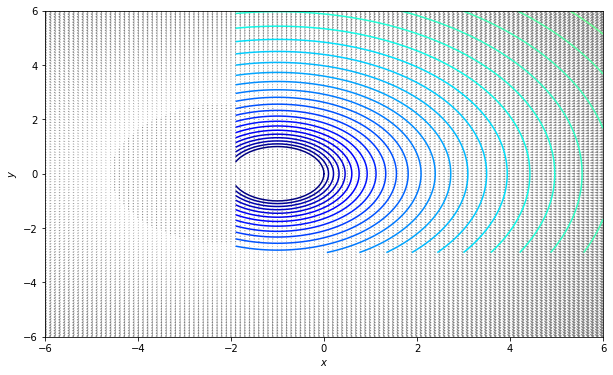

In [9]:
my_plot_2d(x, y, f, None, [])

## Choose datas

In [10]:
x0 = np.array([4, 4.5])
step_s = 1

Here is the plotted vector x0 - s grad(x0)

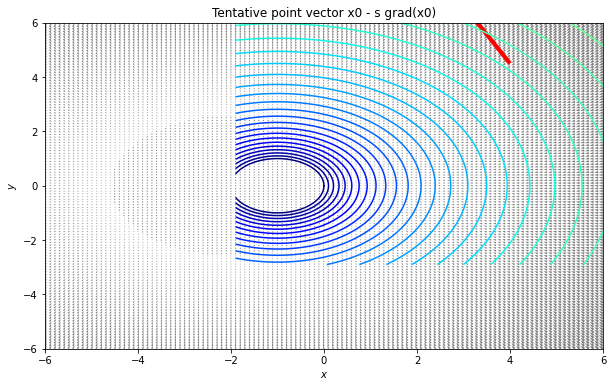

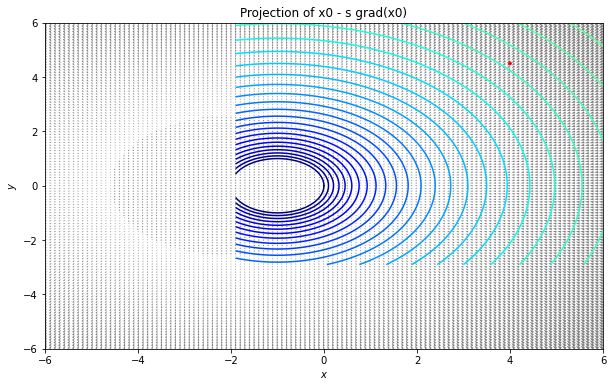

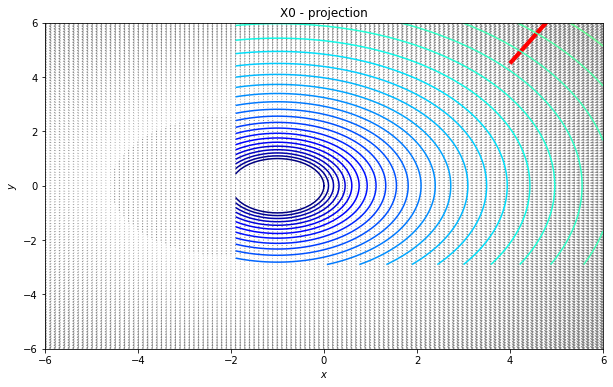

In [11]:
y0 = x0 - step_s * np.array(grad_f(x0[0], x0[1]))
# plot space with that vector
my_plot_2d(x, y, f, None, [[x0[0], x0[1], y0[0], y0[1]]], title='Tentative point vector x0 - s grad(x0)')
if False: # Show also 3d plot
  x0_3, y0_3 = f(x0[0], x0[1]), f(y0[0], y0[1])
  my_plot_3d(x, y, f, None, [[x0[0], x0[1], x0_3, y0[0], y0[1], y0_3]], title='Tentative point vector x0 - s grad(x0)')

# see this: http://www.princeton.edu/~yc5/ele522_optimization/lectures/grad_descent_constrained.pdf
# TODO: Calculate and plot projection
def project_point(x):
  return [0, 0]
proj_x1 = project_point(y0)
my_plot_2d(x, y, f, None, [[x0[0], x0[1], proj_x1[0], proj_x1[1]]], title='Projection of x0 - s grad(x0)')

# TODO: show x0 - projection
res = x0 - proj_x1
my_plot_2d(x, y, f, None, [[x0[0], x0[1], res[0], res[1]]], title='X0 - projection')

# TODO: generate x1 and plot it

# Defining Solver (Projected Gradient) Method class

First define the line search method

In [12]:
def armijo_line_search(f, Df, x0, dk, a=1, gamma=.1, delta=.1, max_iter = 300):
  '''
    f: function
    Df: gradient of function
    dk: given direction
    x0: initial point
  '''
  k = 1
  xk = x0
  while f(xk + a * dk) > f(xk) + gamma * a * np.dot(Df(xk), dk) or k >= max_iter:
    a = delta * a
    k += 1
  print(f"Armijo ended with alpha={a} in {k} steps")
  return a, k

Then define an abstract class for a general solver

In [13]:
from abc import ABC, abstractmethod

# Abstract base class for a solver
class AbstractMethodSolver(ABC):
  def __init__(self):
    self.max_iter = 50
    self.datas = []
    self.i = 0
  
  @abstractmethod
  def calculate_all_points(self, f, Df, x0):
    raise "Not implemented method calculate_all_points"
  
  def get_step(self, index = -1):
    if index == -1:
      val = self.datas[self.i]
      self.i = (self.i +1) % len(self.datas)
    else:
      val = self.datas[index % len(self.datas)]
    return val
  
  def get_length(self):
    return len(self.datas)

Then the optimizer method (Projected gradient or Frank-Wolfe)

In [21]:
# Look at this: https://stackoverflow.com/questions/50723432/gradient-descent-impementation-python-contour-lines

#Use this library: https://github.com/amkatrutsa/liboptpy
# Simple example proj_grad nad frank_wolfe: https://github.com/amkatrutsa/liboptpy/blob/master/examples/demo_simple_set.ipynb
# Complex examples wultiple solvers: https://github.com/amkatrutsa/liboptpy/blob/master/examples/demo_unconstr_solvers.ipynb
import liboptpy.base_optimizer as base
import liboptpy.constr_solvers as cs
import liboptpy.unconstr_solvers as unc_solvers
import liboptpy.step_size as ss


def linsolver_bbox_constr(gradient):
    x = np.zeros(gradient.shape[0])
    pos_grad = gradient > 0
    neg_grad = gradient < 0
    x[pos_grad] = np.zeros(np.sum(pos_grad == True))
    x[neg_grad] = np.ones(np.sum(neg_grad == True))
    return x

# Mockup solver to test plots having fixed datas
class MockupTestSolver(AbstractMethodSolver):
  def __init__(self):
    super().__init__()
  
  def calculate_all_points(self, f, Df, x0):
    #Mock datas
    self.datas = [[4.2, 4.6, 3], [2.3, 3.1, 2], [2, 3, 1],[.5, .2, 1], [0, 0, 1]]


# Working solver based on libopty library and ConjugateGradientFR
class FrankWolfeSolver_liboptpy(AbstractMethodSolver):
  def __init__(self):
    self.tol = 1e-1
    self.solver_result = None
  
  def calculate_all_points(self, f, Df, x0):
    #Mock datas
    # solver = cs.FrankWolfe(f, Df, linsolver_bbox_constr, ss.ConstantStepSize(0.1))#ss.Backtracking(rule_type="Armijo", rho=0.96, beta=0.01, init_alpha=1.))
    solver = unc_solvers.fo.ConjugateGradientFR(f, Df, ss.Backtracking("Armijo", rho=0.009, beta=0.1, init_alpha=1.))
    self.solver_result = solver.solve(x0=x0, max_iter=self.max_iter, tol=self.tol, disp=1)
    print("Solver output: ", self.solver_result)
    d = solver.get_convergence()
    self.datas = [[el[0], el[1], f(el)] for el in d]
    print("Generated", len(self.datas), " datas: ", self.datas)

# Change this if you want to use optimized scipy lib
if False:
  from scipy.optimize import line_search
  armijo_line_search = line_search

# Manual Solver using Convex constrained methods
class ManualProjectedGradientSolver(AbstractMethodSolver):
  def __init__(self):
    super().__init__()
    self.step_s = 0.02
    self.tol = 1e-10
    self.step_max_tol = 1.0000000000000001e-03
  
  def calculate_all_points(self, f, Df, x0):
    k = 0
    xk = x0
    self.datas.append(xk)
    while k < self.max_iter:
      yk = xk - self.step_s * np.array(Df(xk))
      dk = projection_on_set(yk) - xk
      res = armijo_line_search(f, Df, xk, dk,a=10, delta=.01)
      alpha = res[0]
      if alpha is None or alpha < self.tol:
        print("Early stopped because alpha is below tolerance")
        break;
      xk = xk + alpha*dk
      self.datas.append(xk)
      k += 1
      if np.allclose(self.datas[-1], self.datas[-2], rtol=self.step_max_tol):
        print("Early stopped because of convergence")
        break
    self.datas = [[el[0], el[1], f(el)] for el in self.datas]
    print("Generated", len(self.datas), " datas: ", self.datas)

In [22]:
# Define used method
method_used = ManualProjectedGradientSolver()
method_used.max_iter = 50
method_used.calculate_all_points(f_array, grad_f_array, x0)

Armijo ended with alpha=10 in 1 steps
Armijo ended with alpha=10 in 1 steps
Armijo ended with alpha=10 in 1 steps
Armijo ended with alpha=10 in 1 steps
Armijo ended with alpha=10 in 1 steps
Armijo ended with alpha=10 in 1 steps
Armijo ended with alpha=10 in 1 steps
Armijo ended with alpha=10 in 1 steps
Armijo ended with alpha=10 in 1 steps
Armijo ended with alpha=10 in 1 steps
Armijo ended with alpha=10 in 1 steps
Armijo ended with alpha=0.1 in 2 steps
Armijo ended with alpha=0.1 in 2 steps
Armijo ended with alpha=0.1 in 2 steps
Armijo ended with alpha=0.1 in 2 steps
Armijo ended with alpha=0.1 in 2 steps
Armijo ended with alpha=0.001 in 3 steps
Early stopped because of convergence
Generated 18  datas:  [[4.0, 4.5, 45.25], [2.799999999999999, 4.1, 31.249999999999993], [2.0799999999999983, 3.6999999999999993, 23.176399999999983], [1.647999999999997, 3.299999999999999, 17.901903999999977], [1.3887999999999976, 2.8999999999999986, 14.11636543999998], [1.2332799999999975, 2.499999999999998

# Solve the problem and view all 
Let's load some libraries...

In [16]:
# Import needed libraries
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

Define continous plot environment...

In [17]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection='3d', elev=50, azim=-50)
plt.close()

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

# plot space
line1_linspace = ax.plot_surface(x, y, z, cmap=plt.cm.jet, alpha=.35, rstride=1, cstride=1, edgecolor='none',vmin=np.nanmin(z), vmax=np.nanmax(z))
# plot point
POINT_SIZE = 20 # initial point size
line2_point, = ax.plot([0],[0],[0], 
            color='red',
            marker='o', 
            markersize=POINT_SIZE, 
            alpha=0.6)

quiver = ax.quiver(0,0,0,0,0,0, color='red', arrow_length_ratio = 0.3)

# Basic color map:
cmap = plt.cm.jet
cmap.set_bad('w',1.)

# initialization function: plot the background of each frame
def init():
    #line1_linspace = ax.plot_surface(x, y, z, cmap=plt.cm.jet, alpha=.95, rstride=1, cstride=1, edgecolor='none',vmin=np.nanmin(z), vmax=np.nanmax(z))
    return (line1_linspace,)

rotate = False
# animation function. This is called sequentially
def animate(i):
  global POINT_SIZE, rotate
  # check this to update fast blit: https://stackoverflow.com/questions/34631939/python-matplotlib-fast-updating-of-a-single-point-in-a-scatter
  if rotate:
    rotate_view(Rotation.LEFT)
  ax.view_init(rotation_x, rotation_y)
  #ax.clear()
  new_pt = method_used.get_step(i)
  if i+1 < method_used.get_length():
    next_pt = method_used.get_step(i+1)
    quiver.set_segments([[new_pt,next_pt]])
  line2_point.set_data_3d(new_pt[0],new_pt[1],new_pt[2])
  return (line1_linspace, line2_point, quiver)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  


In [18]:
# When needed, execute this to rotate:
#rotate_view(Rotation.RIGHT)
#rotate_view(Rotation.LEFT)
#rotate_view(Rotation.UP)
#rotate_view(Rotation.DOWN)

Execute plot datas and call the animation.
then interact with html generated code.

In [19]:
# Create a continous plot
POINT_SIZE = 15
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=method_used.get_length(), interval=1000, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim

Great now we can see how our function image in the corrisponding domain.

Colors are calculated by LogNorm matplotlib color object.

# Frank-wolfe
Thanks to https://gist.github.com/fabianp/0a3cbf128ffb4b651bd679baadc0949b for surface plotting

Thanks to https://colab.research.google.com/drive/1lnl5UPFWVPrryaZZgEzd0theI6S94c3X#scrollTo=OEwd0xc5eGz9 for FuncAnimation

Thanks to https://github.com/amkatrutsa/liboptpy for Projected Gradient and Frank Wolfe
